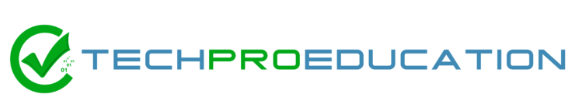

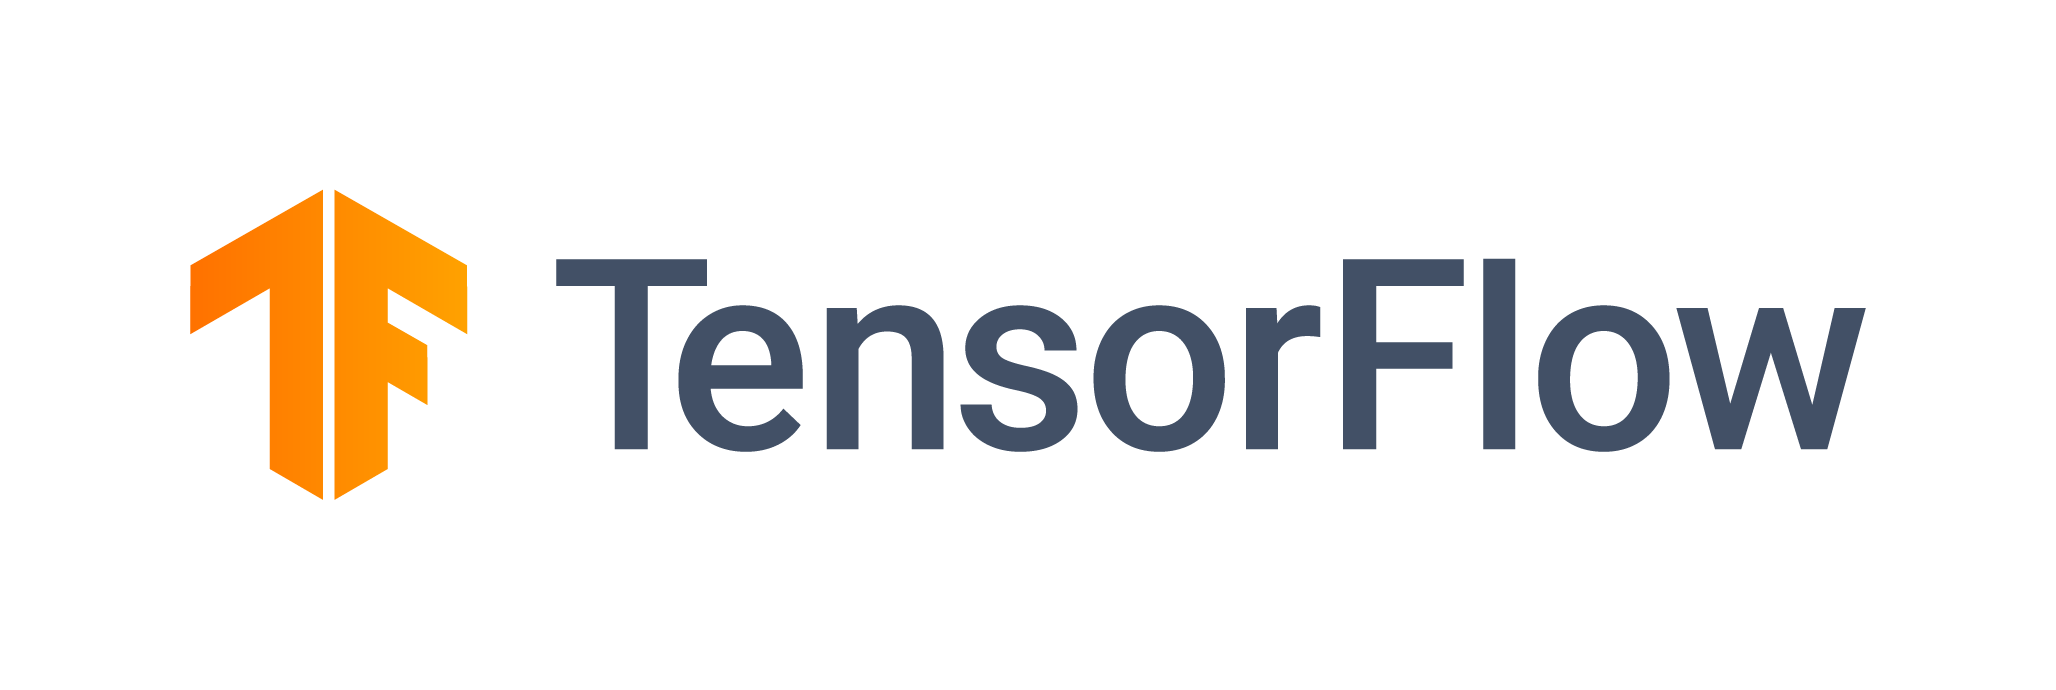

# Installing Tensorflow

In [1]:
#pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
tf.__version__

: 

: 

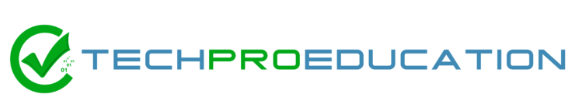

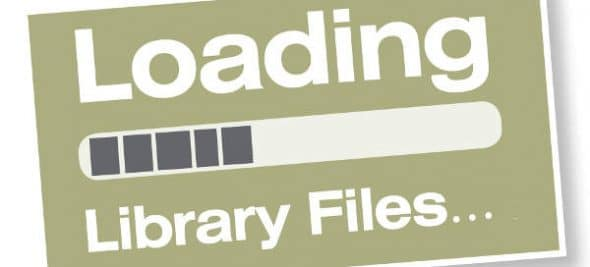

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("fake_reg.csv")

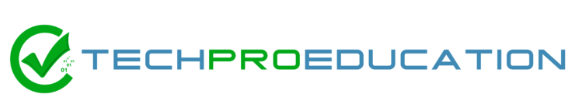

## Exploratory Data Analysis and Visualization

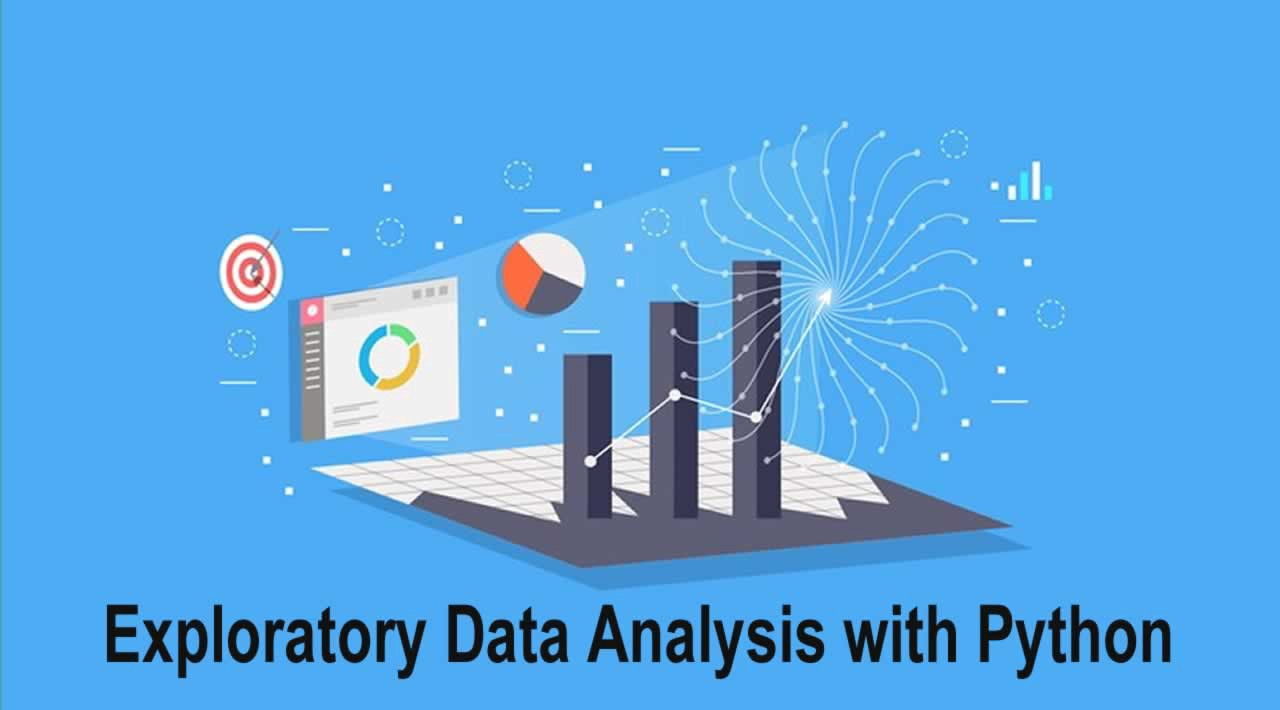

In [5]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [6]:
df.tail()

,price,feature1,feature2
995,476.526,1000.019,999.673
996,457.313,998.855,1000.020
997,456.721,1001.452,998.848
998,403.316,1000.771,998.563
999,599.367,999.232,1001.451


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [8]:
df.describe()

,price,feature1,feature2
count,1000.000,1000.000,1000.000
mean,498.673,1000.014,999.980
std,93.785,0.974,0.948
min,223.347,997.058,996.996
25%,433.026,999.332,999.316
50%,502.382,1000.010,1000.002
75%,564.922,1000.638,1000.645
max,774.408,1003.208,1002.666


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


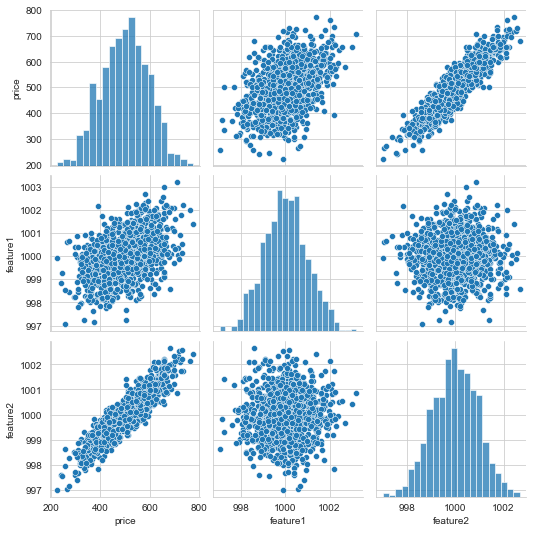

In [10]:
sns.pairplot(df);

In [11]:
df.corr()
#correlasion miktarlari

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


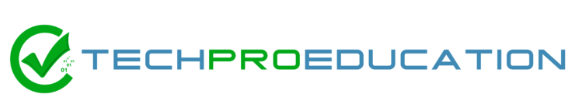

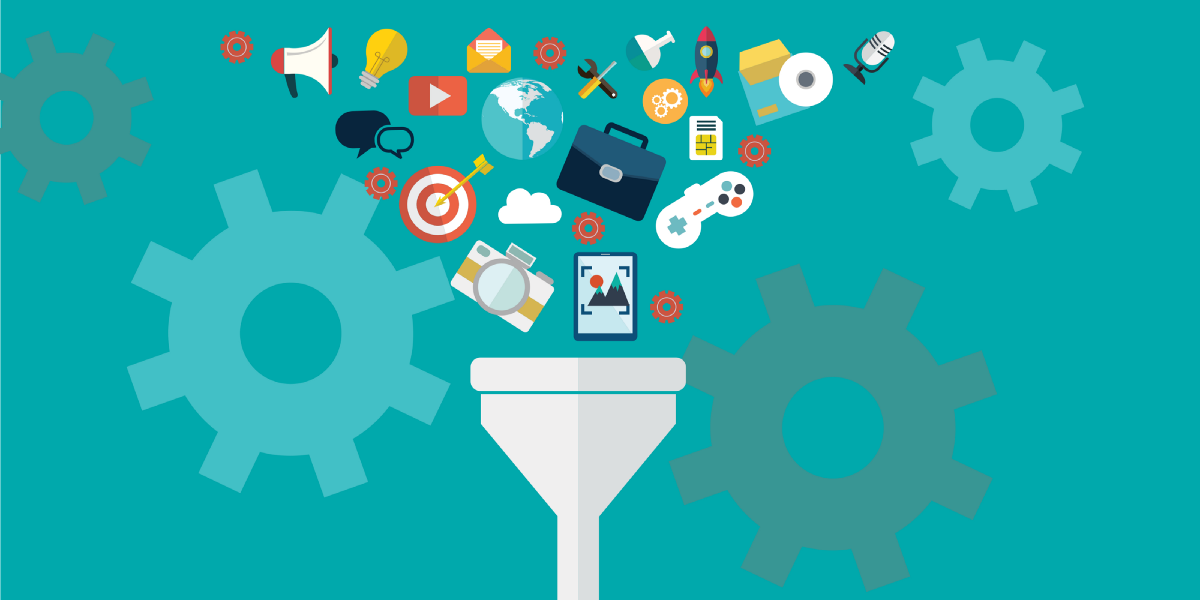

## Preprocessing of Data
- Train | Test Split, Scalling

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df[['feature1', 'feature2']].values  # Önemli! array olarak vereceğiz data setini df olarak vermiyoruz bu nedenle .values ile değerleri alıyoruz
y = df['price'].values

#values diye bisey geldi,unun sebebi DL te array olarak verecegiz datayi, DataFrame olarak degil

In [14]:
X

#busekilde array olrak giriyoruz

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [15]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [17]:
X_train.shape

(700, 2)

In [18]:
X_test.shape

(300, 2)

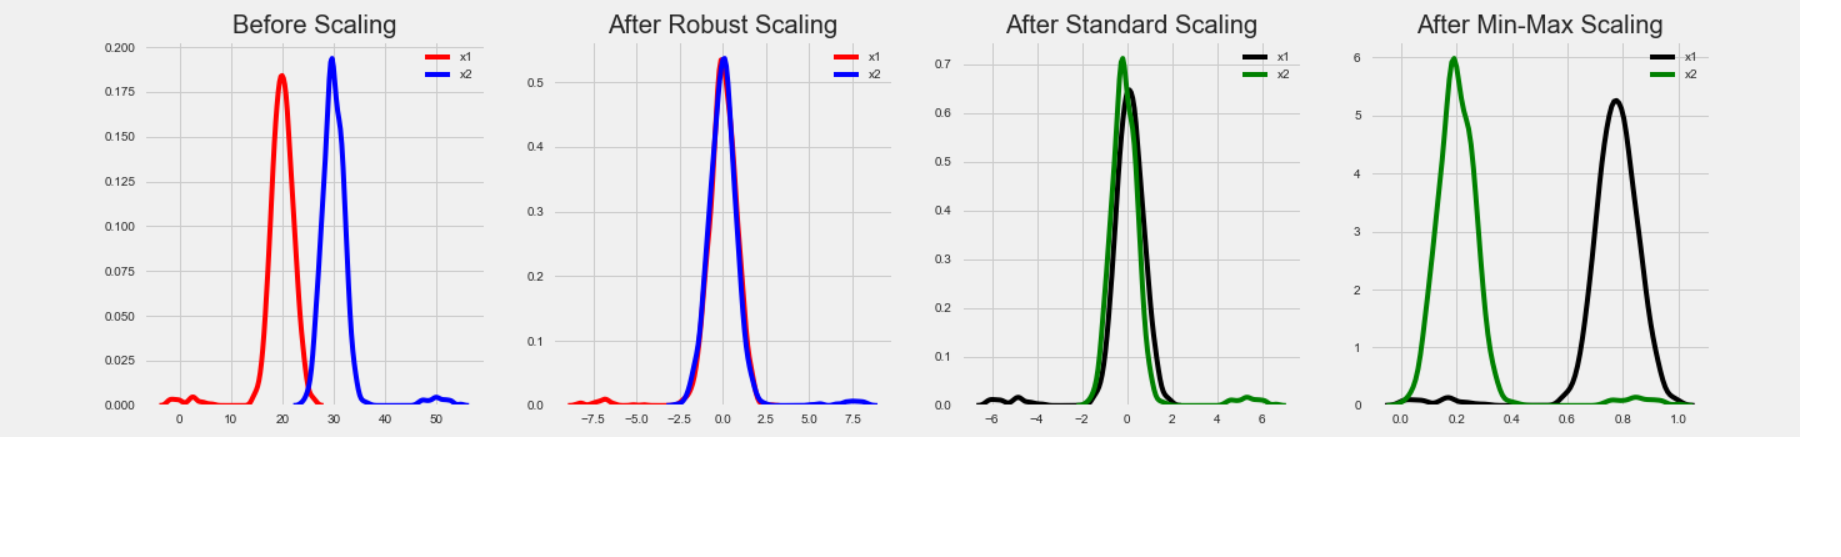

In [19]:
from sklearn.preprocessing import MinMaxScaler 

#Deeplearningte genelde MinMax kullanilir, sifir ile bir arasina sikistirilir
#scale olunca basari artar, ve sayilarin cesitliligi belli bir aralikta olur,

In [20]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to Fal

In [21]:
scaler = MinMaxScaler() # Deep Learning de MinMax kullanmak daha iyidir!

In [22]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# x test fit edilmedigi icin scalinge katilmiyor,ve trainin max degerinden fazla olanlar 1den büyük scale degerleri aliyor
#fit matematiksel hesaplamaları yapıyor transform uyguluyor

In [23]:
X_train.max()
#degerleri 0ile 1  arasina yerlestirdigini görmüs olduk

1.0

In [24]:
X_train.min()

0.0

In [25]:
X_test.max()   #train datasında scaler yaptığımızdan 0 ile 1 arasında değerler gelir  fakat test datasında 1 den büyük 0 dan küçük değerler olabilir

1.0186515935232023

In [26]:
X_test.min()

-0.014108392024525074

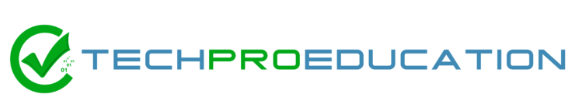

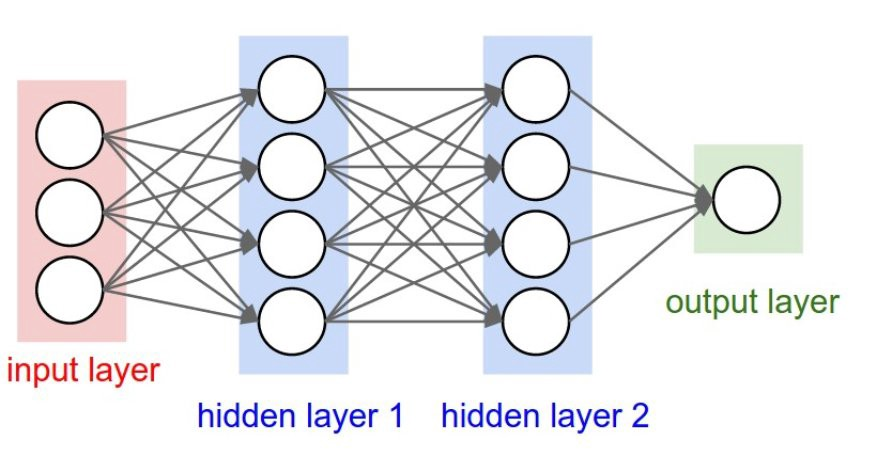

## Modelling

In [27]:
pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import tensorflow as tf

In [29]:
from keras import models

In [30]:
from tensorflow.keras.layers import Dense, Activation
# 'Dense bu katmanlarin birbirine baglantisi olarak düsünebilriz

In [31]:
from tensorflow.keras.models import Sequential
#ardaarda gelmesi anlamina geliyor, arka arkaya gelen hiddenlayer'lar diyebiliriz,katman katman birseylerin olduug anlamina gleiyor


In [32]:
help(Sequential) # arka arka katman oluşturmamı sağlayan yapıdır. ilk olarak modeli squental olarak tanımlarız.

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Se

In [33]:
help(Dense) # katman (layer) cinsi ANN'de en temal katman Dense'dir. fullyhelp(Dense) # katman (layer) cinsi ANN'de en temal katman Dense'dir. fulyconnected layer oluşturmak için Dense kulanılır.

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kern

In [34]:
# First way to create model

model = Sequential([Dense(units = 4, activation = "relu"),   # her bir dense bir layer'i  tanımlar 
                    Dense(units = 4, activation = "relu"),   # units kaç nöron olduğunu söyler fonksiyonuda Relu
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)]) #output layer

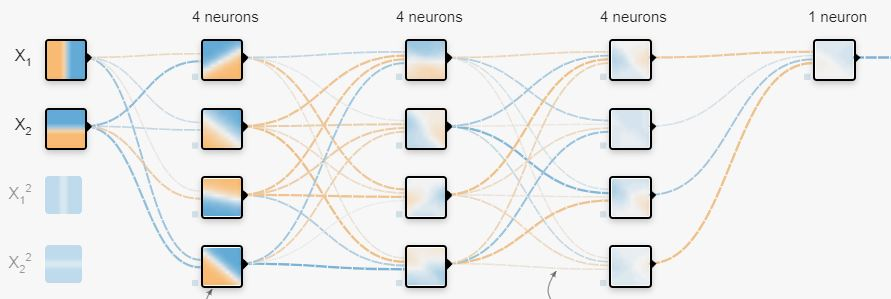

In [35]:
# Second way to create model (recommended)

#ikinci yol bir model kurmak icin

#iki tane features var, burda iki features olduguna dair bir bilgi vermiyourz,zyten basta X,y diye ayirinca vermistik


model = Sequential() #burda katman katman olacagini gösteriyoruz
model.add(Dense(units = 4, activation = "relu"))      #burda 4 ten baska sayilarda alabilirsin, 2nin ve katlari olmasi tavsiye edilir
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu")) 
model.add(Dense(units = 1)) # regression problemi olduğu için 1 output var. burda actication yazmayinca, otomatikmen linear function oluyor

# burda 3 katman yapalim dedik,en son cikti olrak bir rakam cikacak

#burda 3 tane satir var bunlar her biri hdden layer sayisi .icindeki 4 ler ise, hiddenlayerdaki nöron sayisini gösrteriyor
# burda activation functionu olarak relu secilmis

#herbir hidden layer farkli bir activation function olabilir

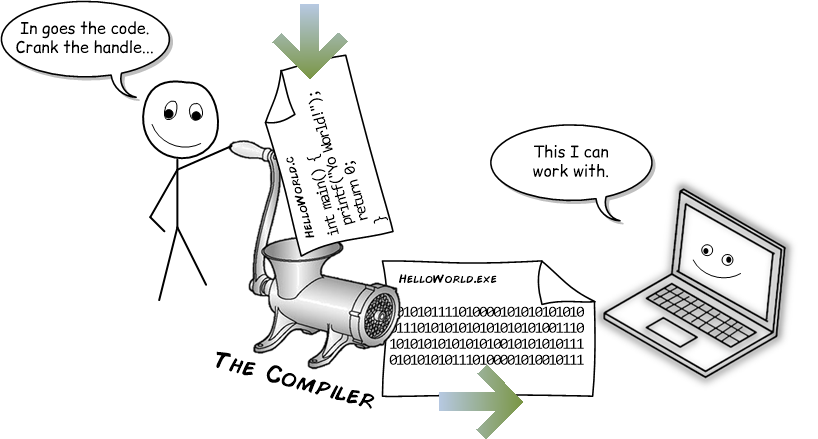

In [36]:
model.compile(optimizer = "rmsprop", loss = "mse") 


# son olarak compile edilir. model kuruldu bu model nasıl çalışacak onu burada belirleriz
#optimizer mincost bulur geriye doğru optimize eder. rmsprop veya adam kullanılablir,
#ilerde genelde adam kullanacagiz,burda veri az oldugu icin adam ve rmsprop yaklasik sonuclar cikarir
# loss loss function regression probleminde genelde mse kullanılır 

# burda hangi talimatlara göre calisacagina karar veriyoruz, 
# Adam büyük verilerde basarisini ortaya koyuyor
# Regression problemlerinde mse kullanilabiliyor
# loss function 1 cikmasi gerekirken 0.60 cikiyorsa, 
#bu deger agirliklarin ve bias degerlerini  güncellemek icin kullaniliyor

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [37]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 300)

#300 defa tüm datayı modele sokacak her iterasyonda 32 satır kullandı (batch_size 32)
# 32 satırın ortalama hata değerini Gradientdecent ile parametreleri backpropogation ile güncelledi 
#bir sonraki epoch bu değerler üzerinden train edilecek bütün epoch lar bitene  kadar devam edecek 
#loss değeri  o epoc un en sonuncu değerini verir 
# batch_size için tek tek verilebilir hızlı olur ama doğruluk oranı azalır,
# yüksek verirsek süre uzar doğruluk oranı artar.datanın tamamı olursa çok yavaş olur fakat çok doğru sonuçlar alınır.
# datanın büyüklüğü ve süreye göre ayarlanır.

# compaire ile talmati verdik fit ile ayarlari uygula,
#batch_size= paketler icindeki veri sayilari

#700 train datasi/32 =22 bu olusan batchlerin toplam sayisi,22 yani iteration sayisi
# her 22 iterationda bir epoch gerceklesiyor

#1.epochta loss degeri var, bu degeri düsürmeye calisiyoruz, her calistirmada farkli sonuclar aliyoruz
# bu örnekte bir yerden sonra 24 civari kaliyor, bir yerden sonrasi bosuna islem gibi sanki, 
#bunun önüne gecmek icin early stop özelligini kullanabiliyoruz


#burda bir yerden sonra 24'ten asagi düsmedigini gördük,

Epoch 1/300
22/22 [==============================] - 1s 3ms/step - loss: 255989.9844
Epoch 2/300
22/22 [==============================] - 0s 2ms/step - loss: 255594.7812
Epoch 3/300
22/22 [==============================] - 0s 2ms/step - loss: 255157.3750
Epoch 4/300
22/22 [==============================] - 0s 2ms/step - loss: 254626.4219
Epoch 5/300
22/22 [==============================] - 0s 2ms/step - loss: 254001.4219
Epoch 6/300
22/22 [==============================] - 0s 2ms/step - loss: 253274.1250
Epoch 7/300
22/22 [==============================] - 0s 2ms/step - loss: 252445.7812
Epoch 8/300
22/22 [==============================] - 0s 2ms/step - loss: 251495.5000
Epoch 9/300
22/22 [==============================] - 0s 2ms/step - loss: 250426.9531
Epoch 10/300
22/22 [==============================] - 0s 2ms/step - loss: 249231.2500
Epoch 11/300
22/22 [==============================] - 0s 2ms/step - loss: 247914.8125
Epoch 12/300
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 2ms/step - loss: 2188.1172
Epoch 98/300
22/22 [==============================] - 0s 2ms/step - loss: 2143.3508
Epoch 99/300
22/22 [==============================] - 0s 2ms/step - loss: 2097.5945
Epoch 100/300
22/22 [==============================] - 0s 2ms/step - loss: 2043.6851
Epoch 101/300
22/22 [==============================] - 0s 2ms/step - loss: 1998.4584
Epoch 102/300
22/22 [==============================] - 0s 2ms/step - loss: 1947.3462
Epoch 103/300
22/22 [==============================] - 0s 2ms/step - loss: 1904.7445
Epoch 104/300
22/22 [==============================] - 0s 2ms/step - loss: 1859.5939
Epoch 105/300
22/22 [==============================] - 0s 2ms/step - loss: 1813.6362
Epoch 106/300
22/22 [==============================] - 0s 2ms/step - loss: 1775.6737
Epoch 107/300
22/22 [==============================] - 0s 2ms/step - loss: 1734.3021
Epoch 108/300
22/22 [==============================] - 0s 2ms/step - loss: 1695.1

22/22 [==============================] - 0s 2ms/step - loss: 24.1613
Epoch 195/300
22/22 [==============================] - 0s 2ms/step - loss: 24.4241
Epoch 196/300
22/22 [==============================] - 0s 2ms/step - loss: 24.2244
Epoch 197/300
22/22 [==============================] - 0s 1ms/step - loss: 24.6163
Epoch 198/300
22/22 [==============================] - 0s 2ms/step - loss: 24.7230
Epoch 199/300
22/22 [==============================] - 0s 2ms/step - loss: 24.0550
Epoch 200/300
22/22 [==============================] - 0s 1ms/step - loss: 24.4695
Epoch 201/300
22/22 [==============================] - 0s 2ms/step - loss: 24.2948
Epoch 202/300
22/22 [==============================] - 0s 2ms/step - loss: 24.8017
Epoch 203/300
22/22 [==============================] - 0s 2ms/step - loss: 24.2621
Epoch 204/300
22/22 [==============================] - 0s 2ms/step - loss: 24.2223
Epoch 205/300
22/22 [==============================] - 0s 2ms/step - loss: 24.5636
Epoch 206/300
22/2

22/22 [==============================] - 0s 2ms/step - loss: 24.0570
Epoch 293/300
22/22 [==============================] - 0s 2ms/step - loss: 24.5675
Epoch 294/300
22/22 [==============================] - 0s 2ms/step - loss: 24.8070
Epoch 295/300
22/22 [==============================] - 0s 2ms/step - loss: 24.4697
Epoch 296/300
22/22 [==============================] - 0s 2ms/step - loss: 24.5242
Epoch 297/300
22/22 [==============================] - 0s 2ms/step - loss: 24.2455
Epoch 298/300
22/22 [==============================] - 0s 2ms/step - loss: 24.1519
Epoch 299/300
22/22 [==============================] - 0s 2ms/step - loss: 24.2579
Epoch 300/300
22/22 [==============================] - 0s 2ms/step - loss: 24.1229


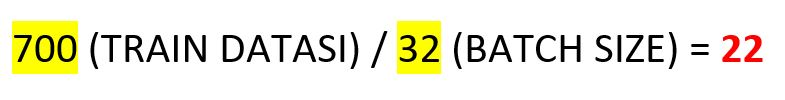

In [38]:
model.summary() # her katmanda kaç parametre olduğunu verir 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


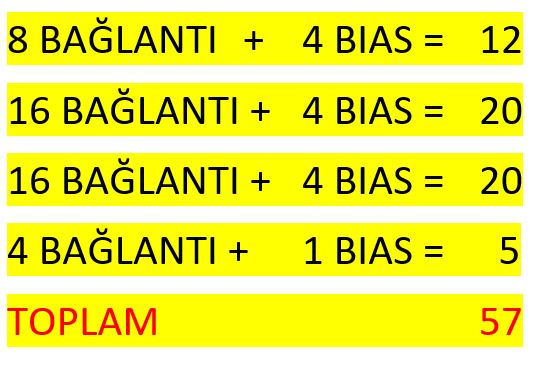

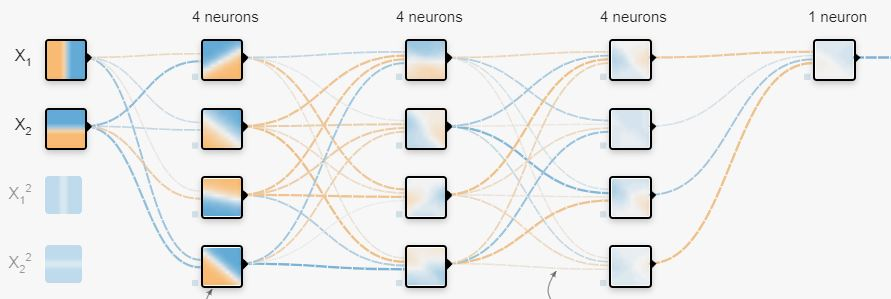

In [39]:
model.weights

 #eğitim sonrası ağırlık değerleri
 #her bir yoluna agirligini göremiyoruz, ama en sonda 

 #ilk satirdaki agirliklar hersey yapildiktan sonra agirlik güncelleme yapildiktan sonra karar verilen agirlik degerlrini görebiliyoruz

 #8 tane agirlik degeri var, ilk hiddenlayer ile, 2featuresx4 norun 8 tane yol oldugu icin 8 tane deger aliyoruz
 # ilk 4 sayir ilk inputun sirasiyla agirlik degerleri.en son backpropagationdan sonraki degerler

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 1.2704957 , -0.19673896,  1.2490335 , -0.36513305],
        [ 2.9478495 , -0.11386561,  2.168572  , -0.6935091 ]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([0.48483196, 0.        , 0.49794284, 0.        ], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 2.6248243 , -0.59383315,  1.5270703 ,  2.4183376 ],
        [-0.84583527, -0.7718628 ,  0.389435  ,  0.3482116 ],
        [ 2.2590892 ,  0.36557597,  2.099594  ,  2.224161  ],
        [ 0.01185012, -0.5388445 ,  0.51850003, -0.11313367]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([0.4734246 , 0.        , 0.49082816, 0.47622305], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 2.0664198 ,  2.422242  ,  0.20464903,  2.2892652 ],
        [ 0.28498   , -0.3045277 , -0.61

In [40]:
model.history.history # model eğitilirken çıkan loss değerlerini verir

{'loss': [255989.984375,
  255594.78125,
  255157.375,
  254626.421875,
  254001.421875,
  253274.125,
  252445.78125,
  251495.5,
  250426.953125,
  249231.25,
  247914.8125,
  246460.234375,
  244885.671875,
  243151.0625,
  241270.53125,
  239245.53125,
  237063.5625,
  234699.609375,
  232180.28125,
  229482.40625,
  226613.984375,
  223551.84375,
  220318.1875,
  216867.5,
  213221.515625,
  209365.875,
  205315.0,
  201046.53125,
  196581.234375,
  191934.609375,
  187049.546875,
  181970.765625,
  176666.421875,
  171154.609375,
  165479.5625,
  159603.890625,
  153524.484375,
  147278.15625,
  140867.84375,
  134298.6875,
  127636.8203125,
  120819.5625,
  113890.625,
  106880.25,
  99812.9375,
  92702.5078125,
  85588.078125,
  78478.453125,
  71442.921875,
  64498.828125,
  57712.35546875,
  51087.8046875,
  44684.0,
  38496.2265625,
  32704.2578125,
  27285.0,
  22303.83203125,
  17790.59765625,
  13798.7138671875,
  10457.0947265625,
  7826.66162109375,
  5916.27294921875,


In [41]:
pd.DataFrame(model.history.history)

,loss
0,255989.984
1,255594.781
2,255157.375
3,254626.422
4,254001.422
...,...
295,24.524
296,24.245
297,24.152
298,24.258


<AxesSubplot:>

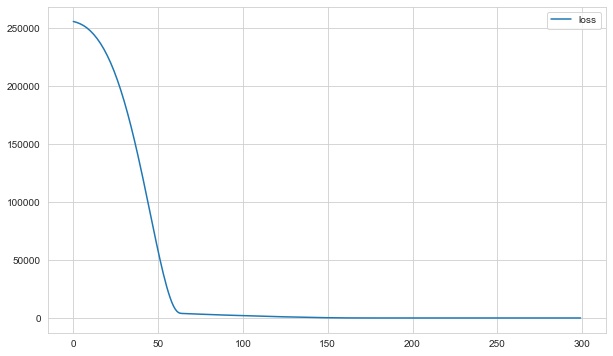

In [42]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
# x ekseni epoch sayisi, y eksenide los degerleri,en sonda 24 e kadar dpspyor ve daha da inmiyor

In [ ]:
# bu yukaridaki grafikten anlasolacagi gibi bir yerden sonra early stopiing yapilabilir

(0.0, 3000.0)

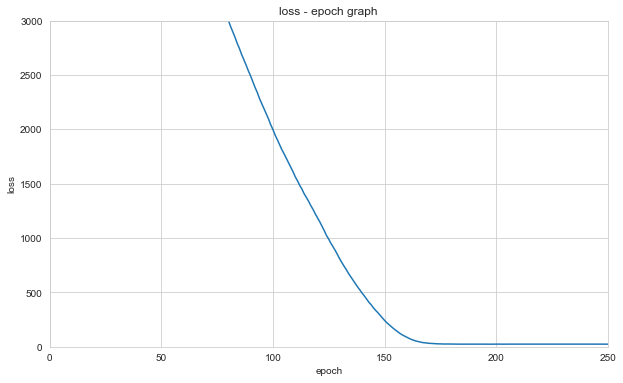

In [43]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

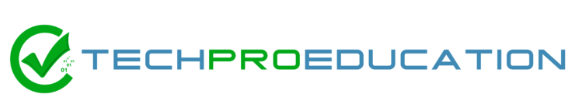

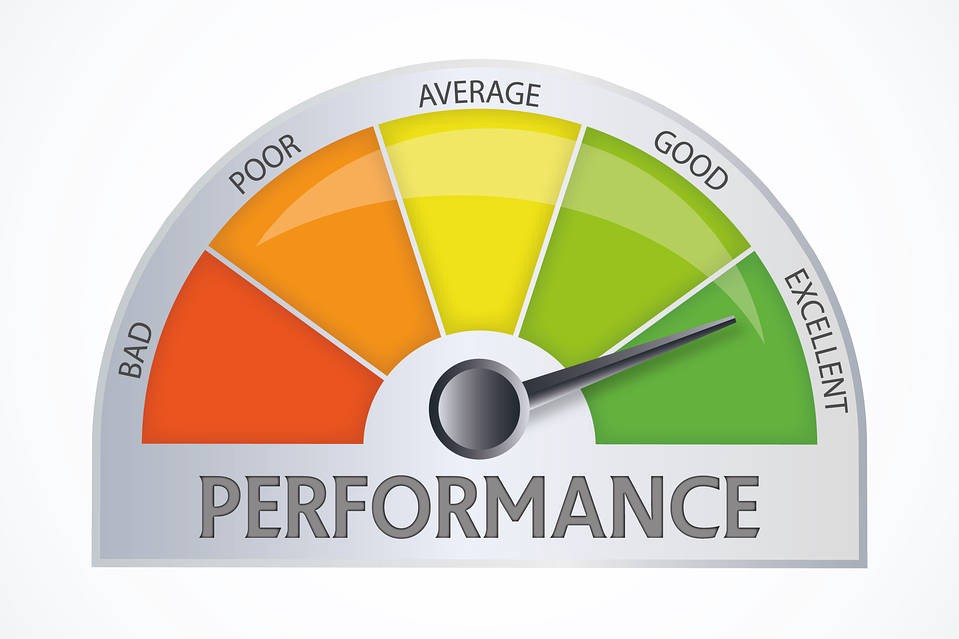

## Model Performance

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

#explained_variance_score ile r2score hemen ayni ayni cikiyormus, bu ikiside r2 diyebiliriz cok kabaca

In [45]:
model.evaluate(X_train, y_train, verbose=0) 

# model oluştururken loss'a hangi skoru verdiysem onun sonucunu verir. "mse"
# arka planda x ve y testi predict alıp sonra evaluate sonucunu veriyor

# kendi icinde train scorunu hesapliyor

25.711631774902344

In [46]:
model.evaluate(X_test, y_test, verbose=0)

28.413482666015625

In [47]:
y_pred = model.predict(X_test)

In [48]:
explained_variance_score(y_test, y_pred) # R2 skorunu verir 1 e yakınsa iyidir

0.997137965089945

In [49]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

# gerçek ve tahmin değerlerini kıyaslarız
#büyük datalarda  milyonluk datalarda DL modeller tercih edilir 


#z = np.array([[1, 2, 3, 4],
 #        [5, 6, 7, 8],
#         [9, 10, 11, 12]])

#z.reshape(-1)
#array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

#z.reshape(-1,1)
#array([[ 1],
#   [ 2],
#   [ 3],
#   [ 4],
#   [ 5],
#   [ 6],
#   [ 7],
#   [ 8],
#   [ 9],
#   [10],
#   [11],
#   [12]])

,Actual,Pred
255,367.792,374.040
133,476.526,473.091
203,396.050,406.080
246,462.882,459.014
42,609.384,606.530
135,574.516,575.570
86,403.316,404.668
46,664.509,671.318
41,411.576,418.056
280,512.584,519.139


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

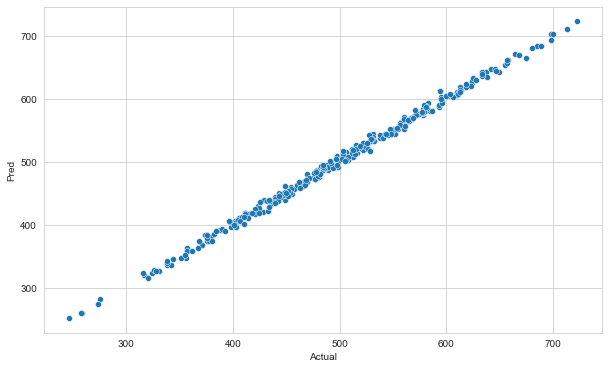

In [50]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

#burda basari ypksek oldugu iicn güzel cikti

In [51]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [52]:
eval_metric(y_test, y_pred)

r2_score: 0.9967682698173902 
mae: 4.330275726886113 
mse: 28.413474099575474 
rmse: 5.3304290727459716


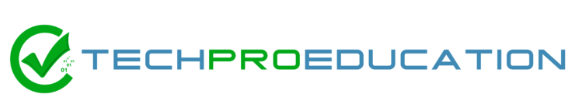

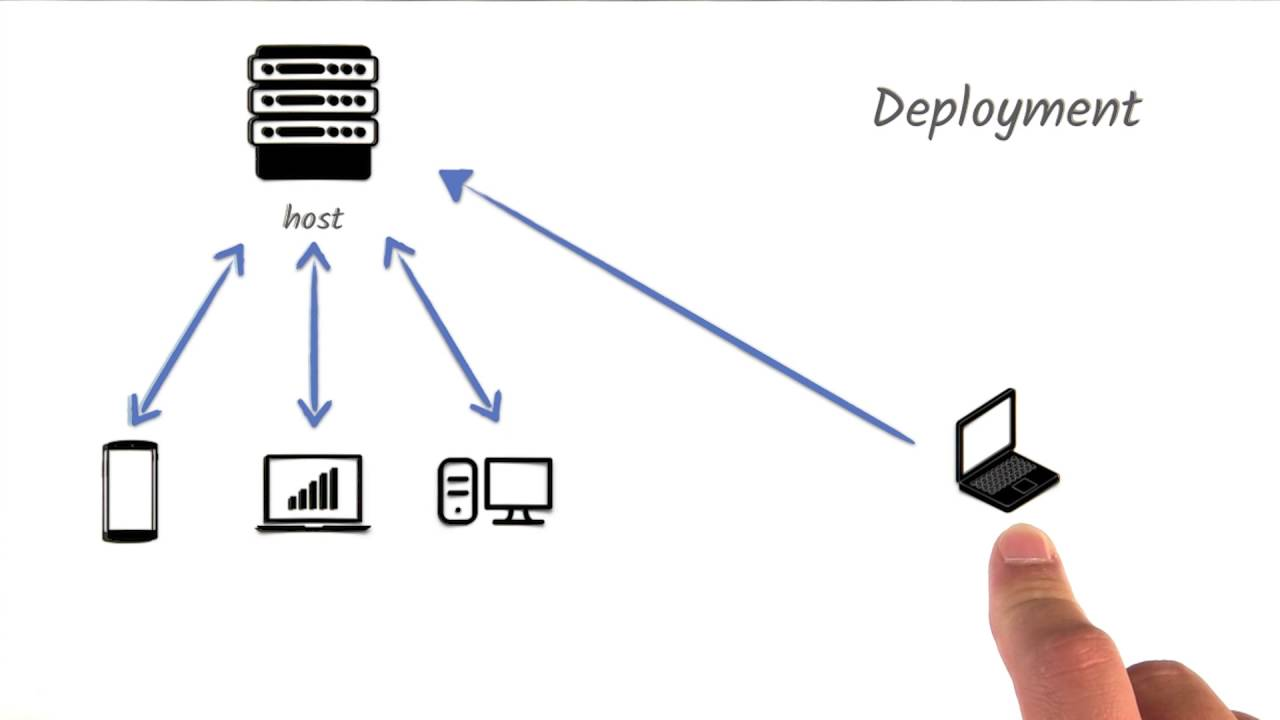

## Final Model and Model Deployment

In [53]:
scaler = MinMaxScaler().fit(X) #burda ne kadar oranlama yapacagini belirliyor, asagida transform ile bu oranlama islemini uyguluyor

#burda tüm datayi veriyoruz,daha iyi ögrensin,

In [54]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [55]:
X_scaled = scaler.transform(X)

In [56]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[0]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 200)

#burda yukardakiburda yapiyoruz, pickle ve scalr yaptiktan sonra 
#burda tekrardan bu islemleri yapiyoruz
# hoca üstte 150 den sonra pek degismedigini gördükten sonra 300 yapmaya gerek yok dedik,
# galiba burda artik en iyi sartlari belirleyip en güzel halini koyuyoruz

#eger burda yukardaki güzel scorlar cikmiyorsa, tekrardan calistirmaliyiz,
# DL deki modeller 



#bunun altinda 200 epoch degerleri vardi ben kapattim,

Epoch 1/300
32/32 [==============================] - 1s 2ms/step - loss: 257311.9844
Epoch 2/300
32/32 [==============================] - 0s 2ms/step - loss: 256859.0312
Epoch 3/300
32/32 [==============================] - 0s 3ms/step - loss: 256362.8438
Epoch 4/300
32/32 [==============================] - 0s 4ms/step - loss: 255771.2188
Epoch 5/300
32/32 [==============================] - 0s 2ms/step - loss: 255077.9219
Epoch 6/300
32/32 [==============================] - 0s 2ms/step - loss: 254253.2188
Epoch 7/300
32/32 [==============================] - 0s 2ms/step - loss: 253279.7500
Epoch 8/300
32/32 [==============================] - 0s 2ms/step - loss: 252134.0156
Epoch 9/300
32/32 [==============================] - 0s 2ms/step - loss: 250788.5156
Epoch 10/300
32/32 [==============================] - 0s 2ms/step - loss: 249251.3750
Epoch 11/300
32/32 [==============================] - 0s 2ms/step - loss: 247476.9844
Epoch 12/300
32/32 [==============================] - 0s 3ms/st

32/32 [==============================] - 0s 2ms/step - loss: 27.9672
Epoch 99/300
32/32 [==============================] - 0s 2ms/step - loss: 27.1113
Epoch 100/300
32/32 [==============================] - 0s 2ms/step - loss: 26.5422
Epoch 101/300
32/32 [==============================] - 0s 2ms/step - loss: 26.2115
Epoch 102/300
32/32 [==============================] - 0s 2ms/step - loss: 25.6477
Epoch 103/300
32/32 [==============================] - 0s 2ms/step - loss: 25.6650
Epoch 104/300
32/32 [==============================] - 0s 2ms/step - loss: 25.5763
Epoch 105/300
32/32 [==============================] - 0s 2ms/step - loss: 25.1443
Epoch 106/300
32/32 [==============================] - 0s 2ms/step - loss: 25.2189
Epoch 107/300
32/32 [==============================] - 0s 1ms/step - loss: 25.3075
Epoch 108/300
32/32 [==============================] - 0s 1ms/step - loss: 24.9113
Epoch 109/300
32/32 [==============================] - 0s 2ms/step - loss: 25.1724
Epoch 110/300
32/32

32/32 [==============================] - 0s 2ms/step - loss: 24.8886
Epoch 197/300
32/32 [==============================] - 0s 1ms/step - loss: 24.9550
Epoch 198/300
32/32 [==============================] - 0s 2ms/step - loss: 25.2488
Epoch 199/300
32/32 [==============================] - 0s 1ms/step - loss: 24.6296
Epoch 200/300
32/32 [==============================] - 0s 1ms/step - loss: 25.0500
Epoch 201/300
32/32 [==============================] - 0s 2ms/step - loss: 24.7711
Epoch 202/300
32/32 [==============================] - 0s 1ms/step - loss: 24.6684
Epoch 203/300
32/32 [==============================] - 0s 2ms/step - loss: 24.9313
Epoch 204/300
32/32 [==============================] - 0s 2ms/step - loss: 24.6506
Epoch 205/300
32/32 [==============================] - 0s 2ms/step - loss: 24.6407
Epoch 206/300
32/32 [==============================] - 0s 2ms/step - loss: 25.0270
Epoch 207/300
32/32 [==============================] - 0s 2ms/step - loss: 25.0044
Epoch 208/300
32/3

32/32 [==============================] - 0s 2ms/step - loss: 24.9544
Epoch 295/300
32/32 [==============================] - 0s 2ms/step - loss: 24.6892
Epoch 296/300
32/32 [==============================] - 0s 2ms/step - loss: 24.7290
Epoch 297/300
32/32 [==============================] - 0s 2ms/step - loss: 24.8247
Epoch 298/300
32/32 [==============================] - 0s 2ms/step - loss: 25.0940
Epoch 299/300
32/32 [==============================] - 0s 2ms/step - loss: 24.7663
Epoch 300/300
32/32 [==============================] - 0s 2ms/step - loss: 24.9381


H5 is a file format to store structured data, it's not a model by itself. Keras saves models in this format as it can easily store the weights and model configuration in a single file.

In [57]:
final_model.save('model_fake.h5')  # creates a HDF5 file 'my_model.h5'

#burda modeli hafizaya aliyoruz

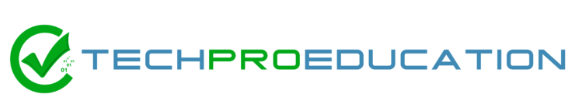

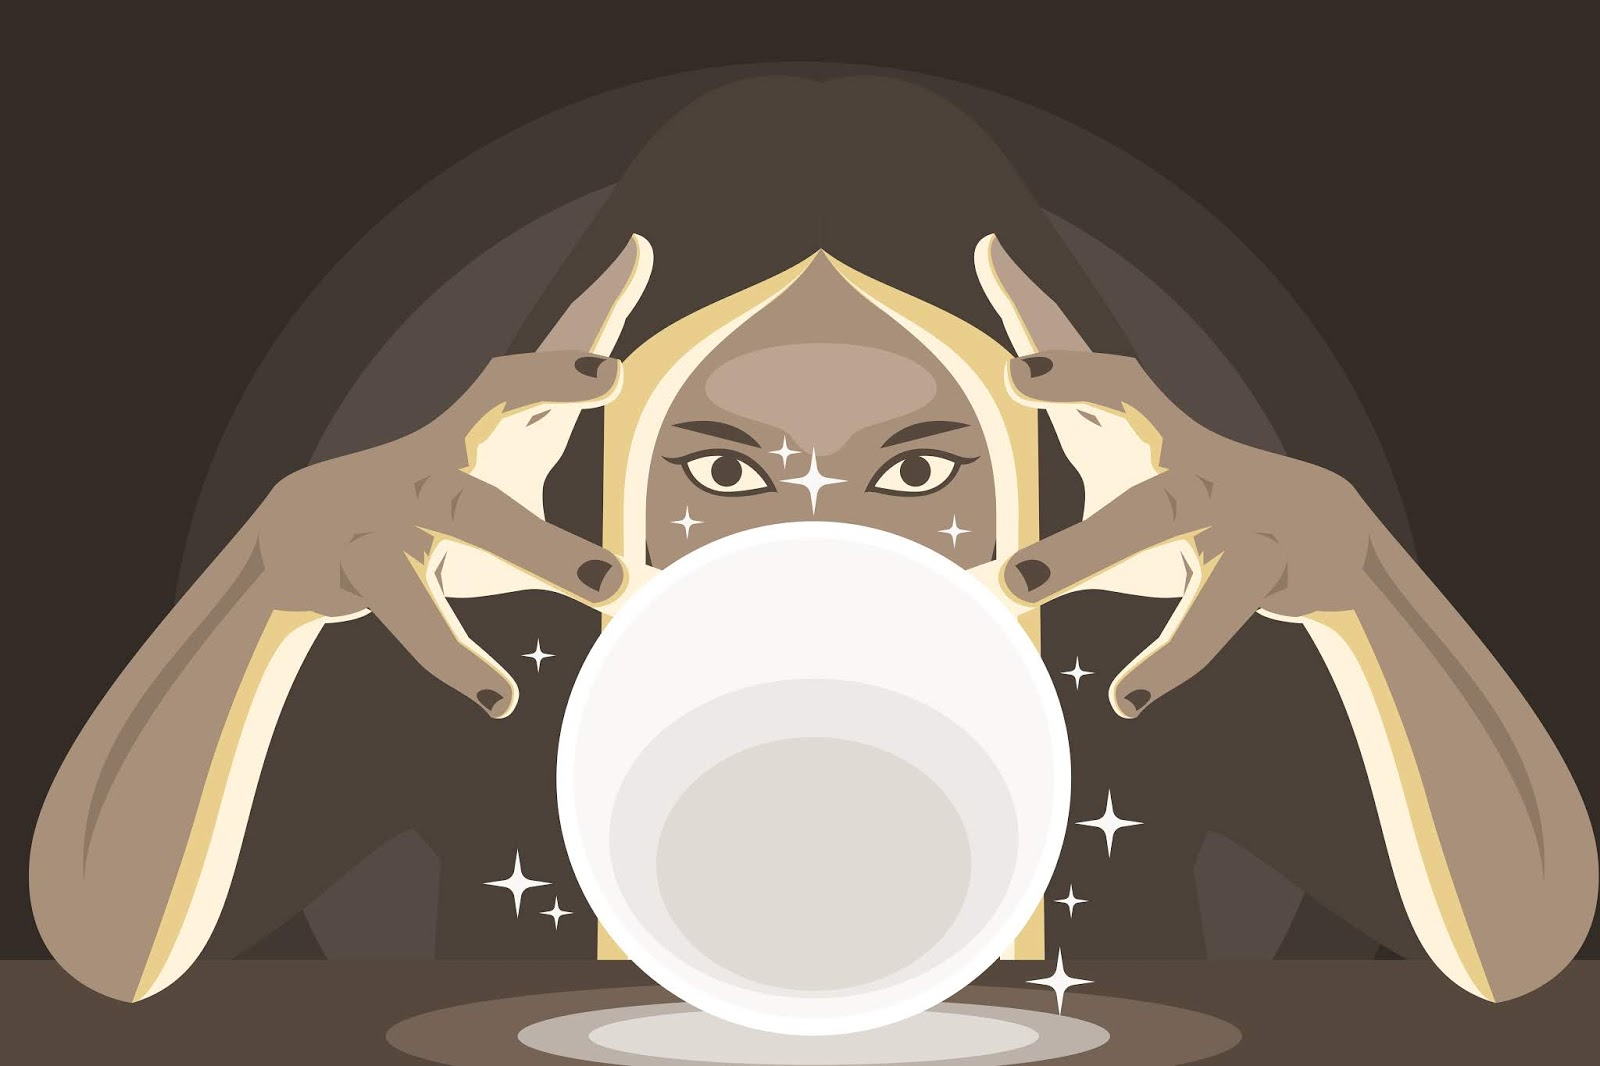

## Prediction-1

In [58]:
from tensorflow.keras.models import load_model # modeli  yükleriz 

In [59]:
model_fake_reg = load_model('model_fake_reg.h5')  #h5 DL ye özel bir uzanti,bu bunun DL dosyasi oldugunu gösteriyor

In [60]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

In [61]:
sample = [[998, 1000]]

In [62]:
sample_scaled = scaler_fake_reg.transform(sample)

In [63]:
model_fake_reg.predict(sample_scaled)

array([[420.38806]], dtype=float32)

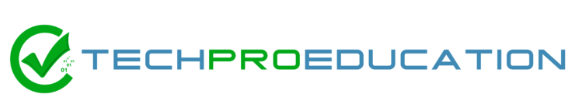

## Prediction-2

In [64]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],  # birden fazla değerrleride pred yapabiliriz.
           "Feature2": [1000, 999, 998, 997, 996]}   # scale yaptığımızdan array olarak sonuç vereceği için array a çevirmeye gerek yok

In [65]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [66]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [67]:
model_fake_reg.predict(sample_scaled)

array([[380.18512],
       [331.79532],
       [283.40552],
       [235.01573],
       [186.62595]], dtype=float32)

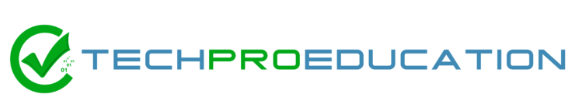